<a href="https://colab.research.google.com/github/amitsiwach/Miscellaneous-Projects/blob/main/Marketing_Mix_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data processing

In [30]:
import pandas as pd
import seaborn as sns

In [31]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Advertising.csv',)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
data.shape

(200, 5)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [35]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [36]:
data.isnull().sum(axis=0)

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [37]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


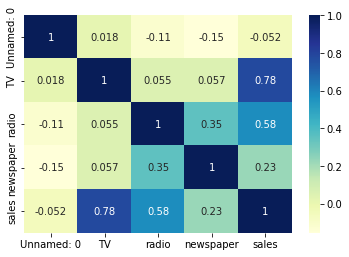

In [38]:
sns.heatmap(data.corr(),cmap='YlGnBu',  annot=True)

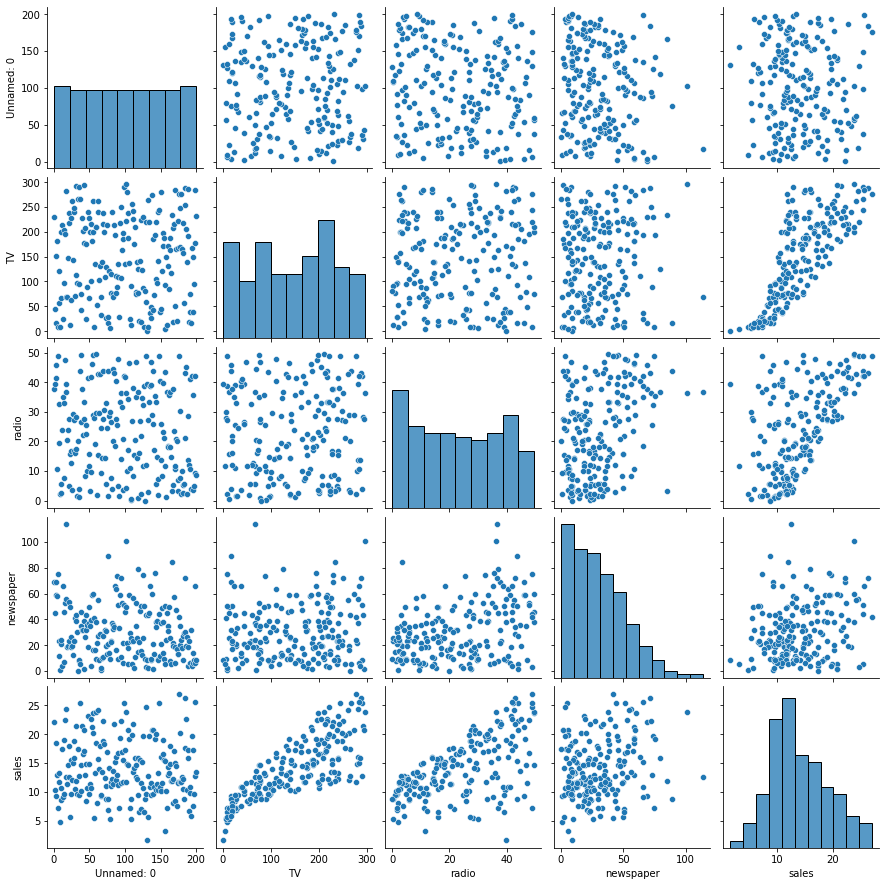

In [39]:
sns.pairplot(data)

In [40]:
lag1 = pd.concat([data[['TV',	'radio',	'newspaper']].shift(),data[['sales']]], axis=1)

In [41]:
lag1

,TV,radio,newspaper,sales
0,NaN,NaN,NaN,22.1
1,230.1,37.8,69.2,10.4
2,44.5,39.3,45.1,9.3
3,17.2,45.9,69.3,18.5
4,151.5,41.3,58.5,12.9
...,...,...,...,...
195,149.7,35.6,6.0,7.6
196,38.2,3.7,13.8,9.7
197,94.2,4.9,8.1,12.8
198,177.0,9.3,6.4,25.5


In [42]:
df_lag1 = lag1.dropna()

In [43]:
df_lag1

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,10.4
2,44.5,39.3,45.1,9.3
3,17.2,45.9,69.3,18.5
4,151.5,41.3,58.5,12.9
5,180.8,10.8,58.4,7.2
...,...,...,...,...
195,149.7,35.6,6.0,7.6
196,38.2,3.7,13.8,9.7
197,94.2,4.9,8.1,12.8
198,177.0,9.3,6.4,25.5


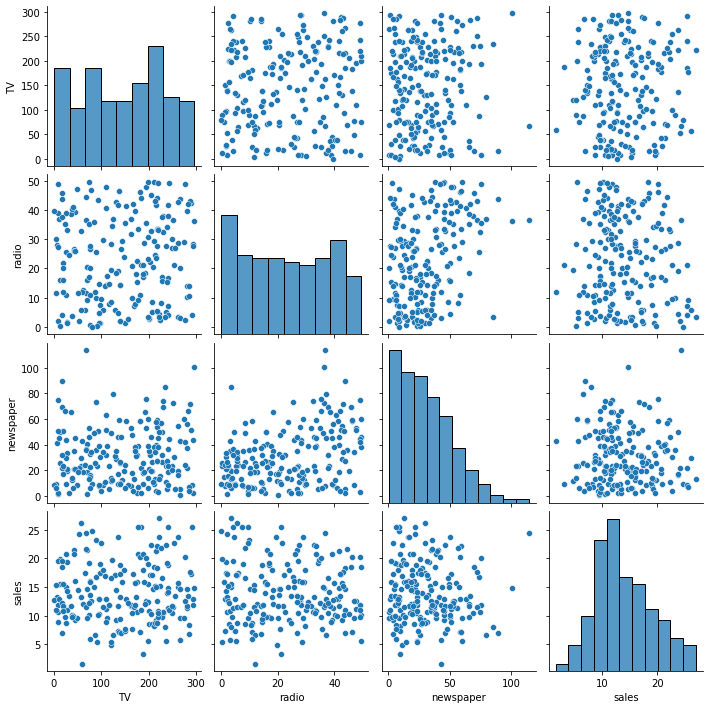

In [44]:
sns.pairplot(df_lag1)

In [45]:
lag2 = pd.concat([data[['TV',	'radio',	'newspaper']].shift(2),data[['sales']]], axis=1)
df_lag2 = lag2.dropna()
df_lag2

,TV,radio,newspaper,sales
2,230.1,37.8,69.2,9.3
3,44.5,39.3,45.1,18.5
4,17.2,45.9,69.3,12.9
5,151.5,41.3,58.5,7.2
6,180.8,10.8,58.4,11.8
...,...,...,...,...
195,166.8,42.0,3.6,7.6
196,149.7,35.6,6.0,9.7
197,38.2,3.7,13.8,12.8
198,94.2,4.9,8.1,25.5


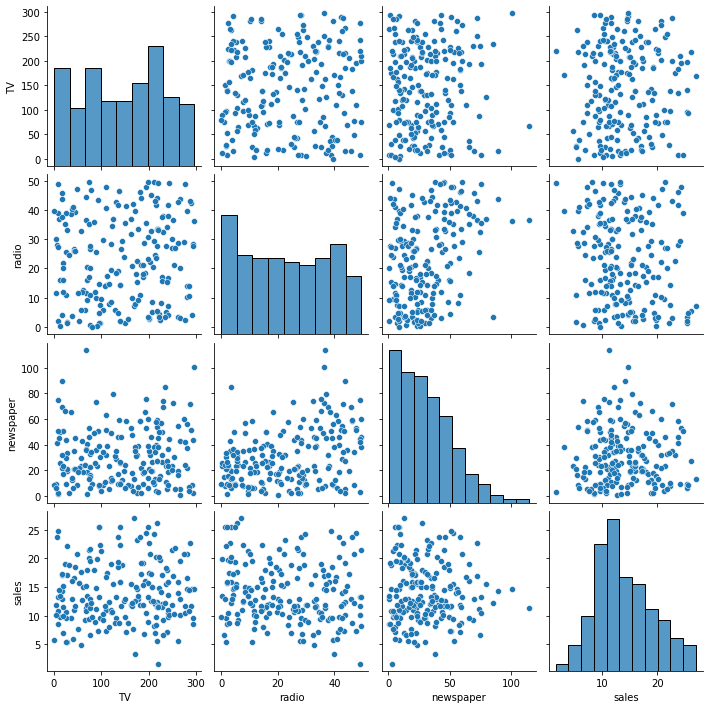

In [46]:
sns.pairplot(df_lag2)

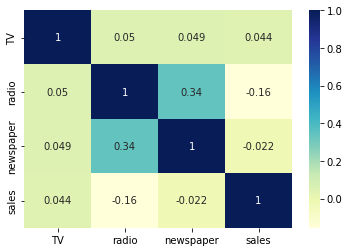

In [47]:
sns.heatmap(df_lag2.corr(),cmap='YlGnBu',  annot=True)

In [48]:
lag3 = pd.concat([data[['TV',	'radio',	'newspaper']].shift(3),data[['sales']]], axis=1)
df_lag3 = lag3.dropna()
df_lag3.head()

,TV,radio,newspaper,sales
3,230.1,37.8,69.2,18.5
4,44.5,39.3,45.1,12.9
5,17.2,45.9,69.3,7.2
6,151.5,41.3,58.5,11.8
7,180.8,10.8,58.4,13.2


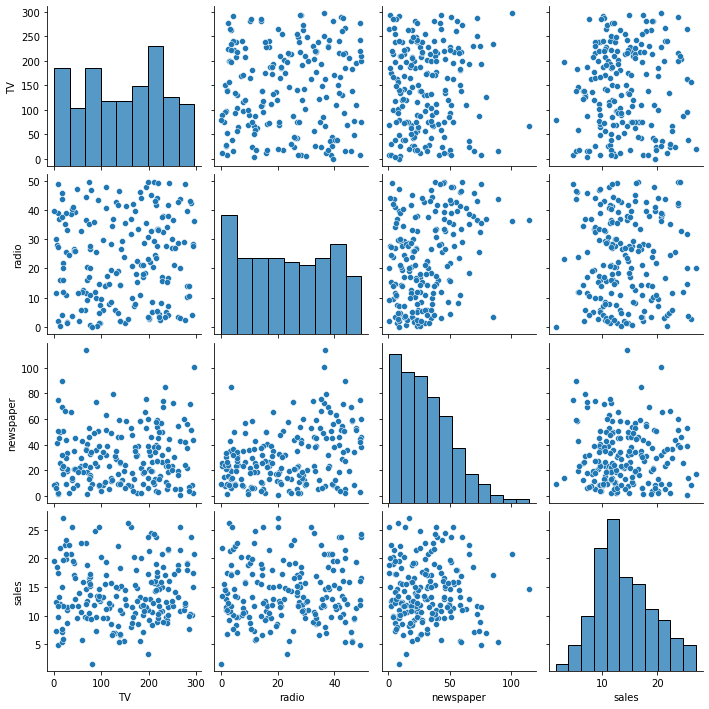

In [49]:
sns.pairplot(df_lag3)

# Adstock(Decay) Variable

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Advertising.csv',)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [52]:
x= np.array([1,2,3,4])

In [53]:
def AdStock(x,L,P,D):
  x = np.append(np.zeros(L-1),x)
  weights = [(D)**(l-P)**2 for l in range(L)][::-1]

  Adstock=[]
  for i in range(L-1,len(x)):
    x_array = x[i-L+1:i+1]
    xi = sum(x_array*weights)/sum(weights)
    Adstock.append(xi)
  return np.array(Adstock)

In [54]:
AdStock(x,5, 1, .8)

array([0.25446768, 0.82701996, 1.65403991, 2.61134732])

In [55]:
AdStock(data['TV'], 5, 1, .8)

array([ 58.55301291,  84.51507784,  77.08462162,  85.32586276,
       114.19577414, 102.41618209,  83.87984538,  81.11464718,
        63.90640381,  92.0281388 , 100.67741413, 132.75436651,
       117.56799676, 104.15720324, 119.80112857, 151.72159059,
       145.06260266, 173.65052166, 158.54280413, 148.27736987,
       159.59621243, 188.39297946, 156.59366712, 157.44771299,
       132.08532673, 156.66621008, 166.14937608, 191.31515862,
       212.95942144, 188.04451525, 197.68470284, 182.52780732,
       154.99980371, 168.409131  , 160.78419815, 189.48499978,
       223.49124025, 201.6869308 , 144.6061432 , 137.92126995,
       156.14767588, 176.27606694, 214.08797911, 227.19690001,
       178.61668153, 150.99956134, 124.40052152, 146.23958757,
       180.83421946, 169.50176196, 165.02304366, 145.96900732,
       156.26112908, 169.73542749, 201.60855269, 213.1207843 ,
       165.00246554, 129.61631761, 135.95204116, 164.76972615,
       152.33303927, 170.40559629, 194.07480645, 184.70

In [56]:
AdStock(data['radio'], 5, 1, .8)

array([ 9.61887826, 22.02417761, 33.79966944, 40.03504366, 34.29928814,
       34.0463112 , 33.9895894 , 31.03451937, 21.9475165 , 12.67825629,
        6.79126569,  9.72410938, 18.47016025, 20.07261602, 23.09576098,
       30.1347577 , 35.34683365, 38.46784553, 34.74555229, 29.48438925,
       26.58949598, 20.55202547, 16.70609048, 15.28514941, 14.47500937,
       11.48830929, 14.65616199, 16.82325255, 20.65792263, 20.90803212,
       22.61355638, 21.74477084, 16.35937732, 14.36443444, 10.57485025,
        7.51627178, 15.47587386, 28.58238051, 34.24729871, 36.53862362,
       32.76684127, 30.77362752, 29.39913867, 23.96261325, 21.56413037,
       21.07272045, 18.49295223, 23.14197425, 23.76899747, 20.81384627,
       14.36061484, 10.23650812, 16.6526703 , 28.36681867, 34.01858638,
       39.33078215, 37.99215145, 32.11933635, 33.5451097 , 33.93966349,
       26.2152088 , 26.29069098, 23.99642913, 24.84833083, 29.89942916,
       27.35524271, 24.62755207, 20.72121554, 20.90890899, 27.21

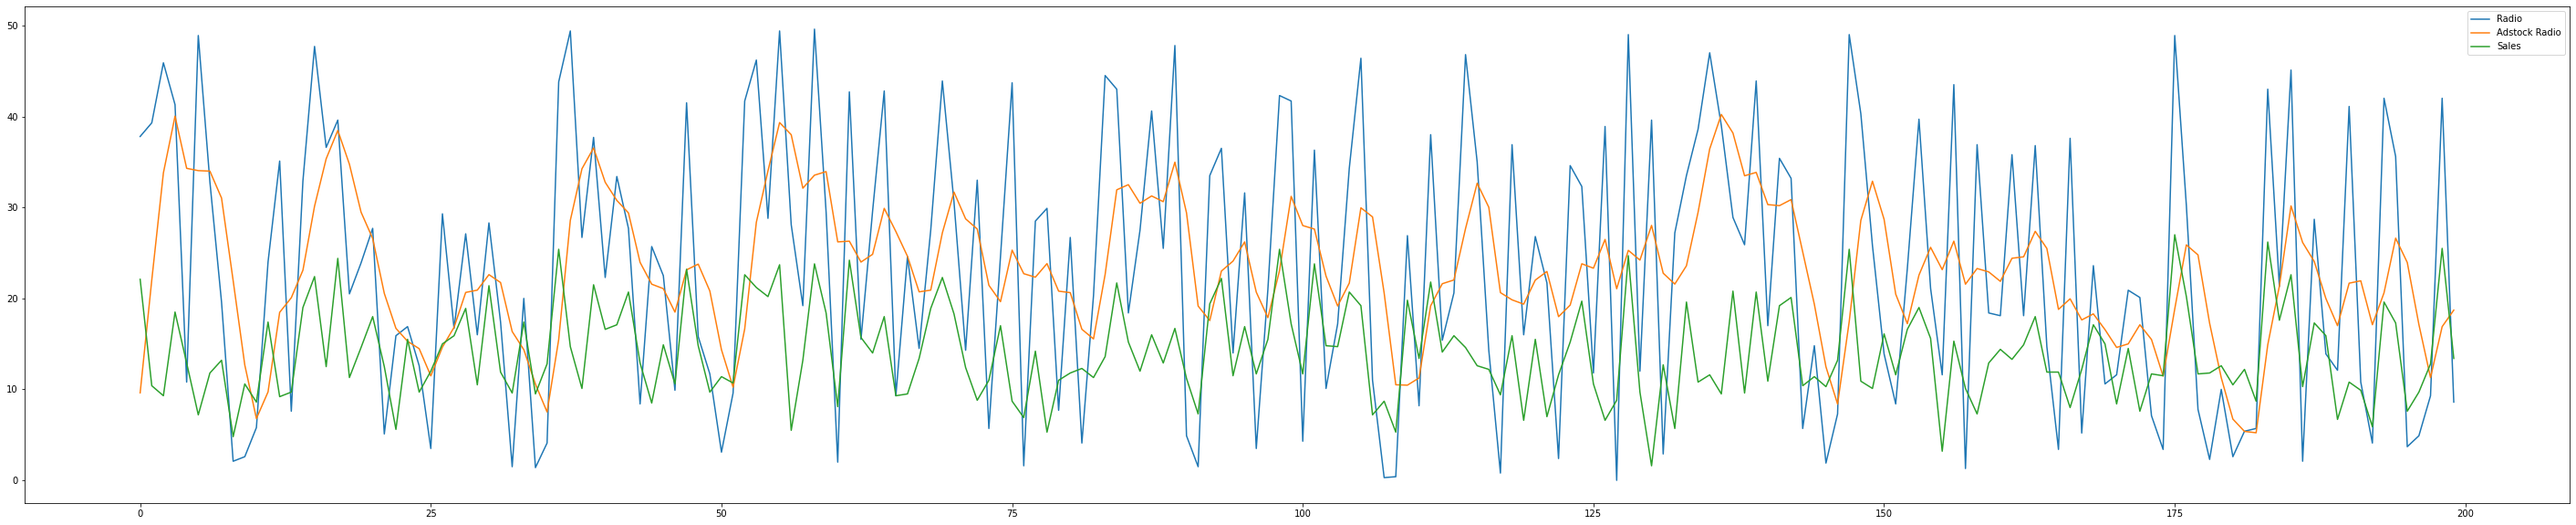

In [57]:
plt.figure(figsize=[50,10])
plt.plot(data['radio'], label='Radio')
plt.plot(AdStock(data['radio'], 5, 1, .8), label='Adstock Radio')
plt.plot(data['sales'], label='Sales')
plt.legend();

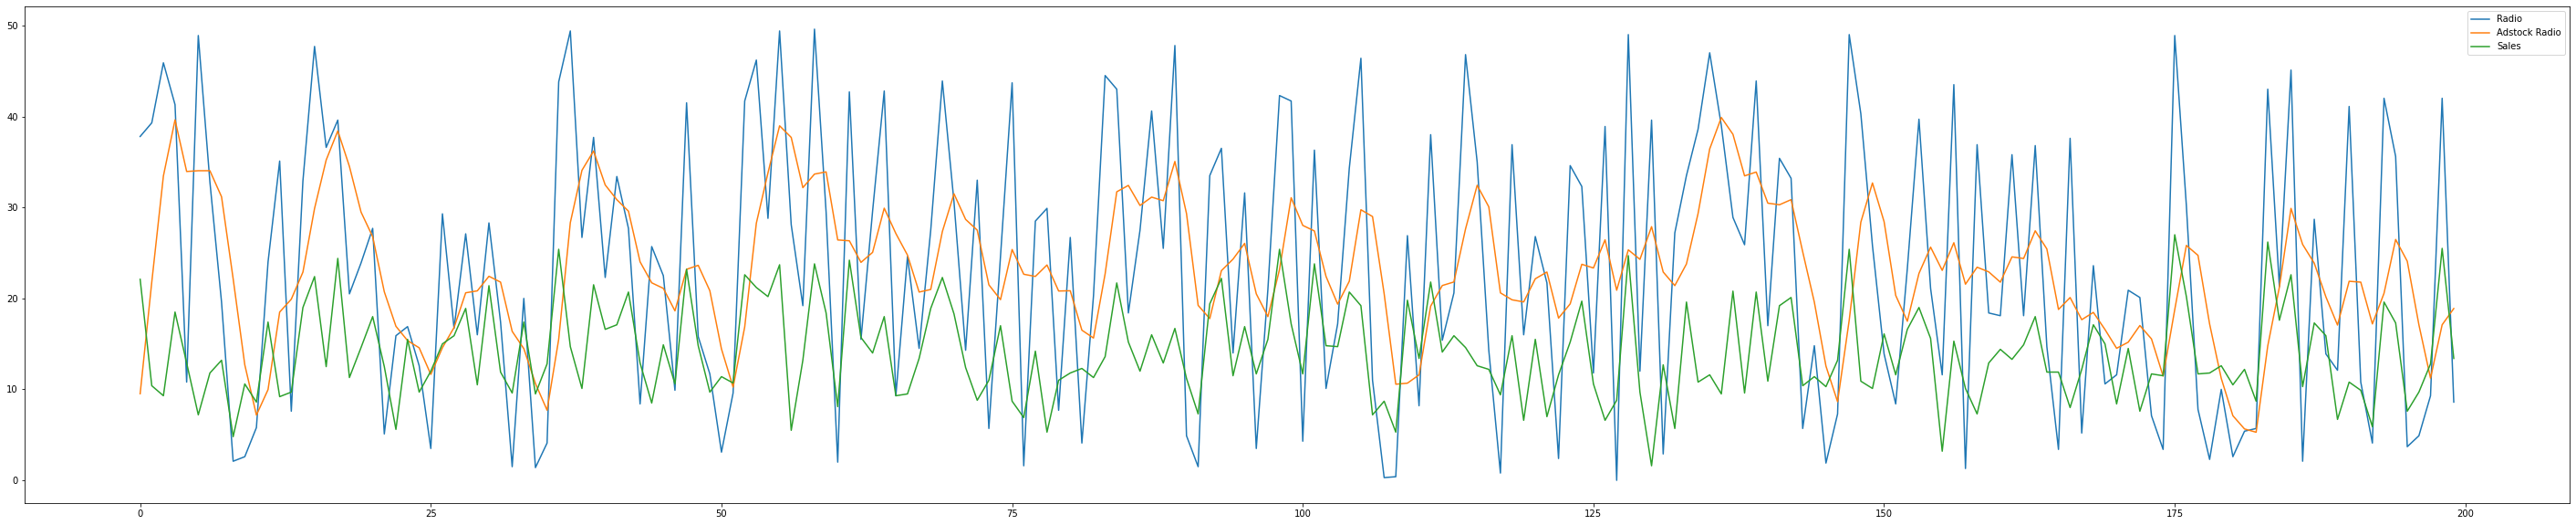

In [58]:
plt.figure(figsize=[50,10])
plt.plot(data['radio'], label='Radio')
plt.plot(AdStock(data['radio'], 15, 1, .8), label='Adstock Radio')
plt.plot(data['sales'], label='Sales')
plt.legend();

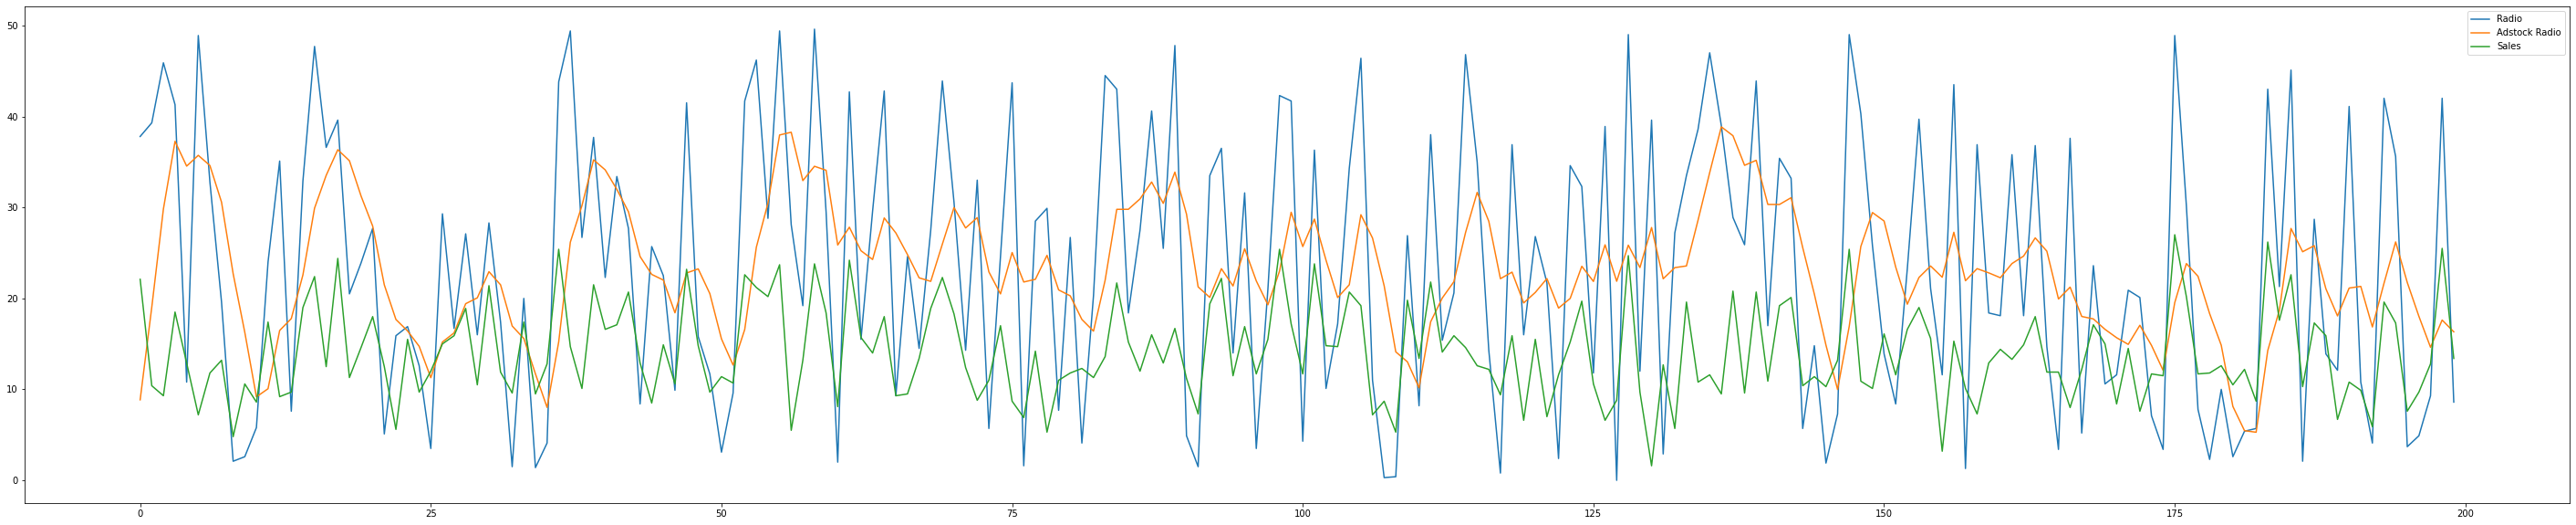

In [59]:
plt.figure(figsize=[50,10])
plt.plot(data['radio'], label='Radio')
plt.plot(AdStock(data['radio'], 5, 1, .9), label='Adstock Radio')
plt.plot(data['sales'], label='Sales')
plt.legend();

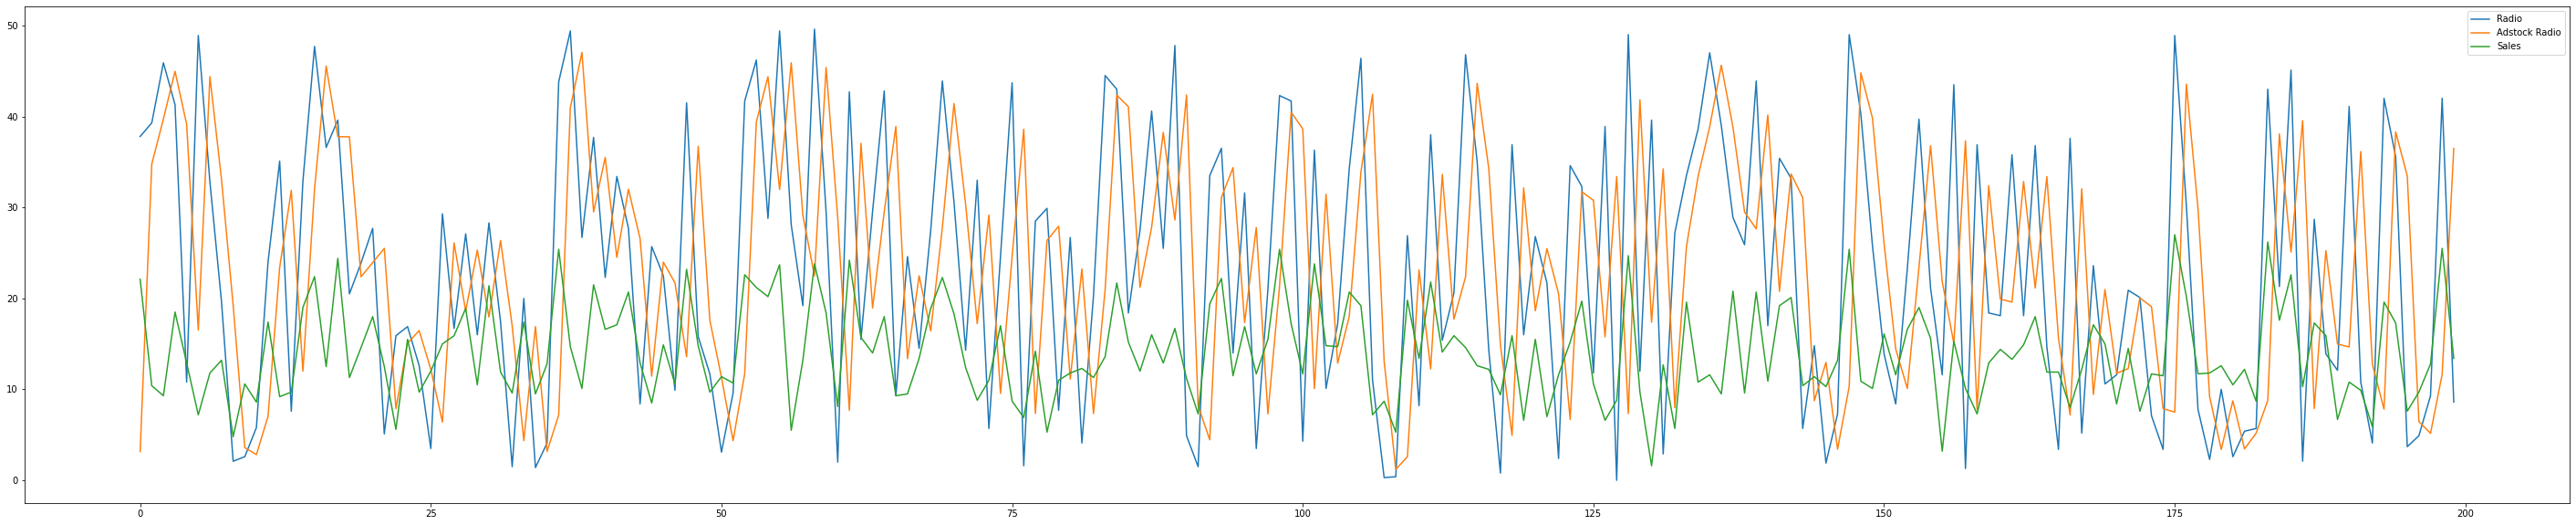

In [60]:
plt.figure(figsize=[50,10])
plt.plot(data['radio'], label='Radio')
plt.plot(AdStock(data['radio'], 5, 1, .1), label='Adstock Radio')
plt.plot(data['sales'], label='Sales')
plt.legend();

# Diminishing Returns

In [61]:
def diminishing_returns(x, k, s):
  return 1 / (1 + (x / k)**(-s))

In [62]:
x = np.arange(0,2, 0.05)

In [63]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


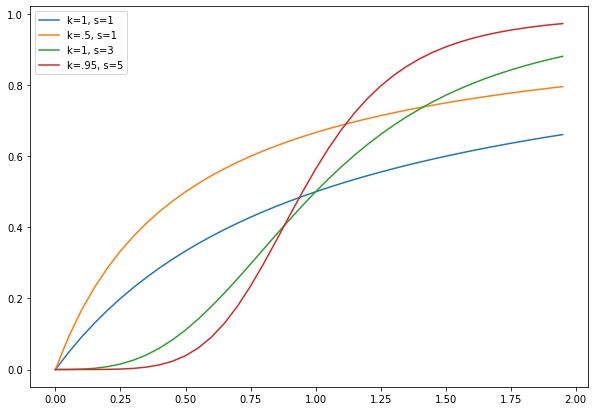

In [64]:
plt.figure(figsize=[10,7])
plt.plot(x, diminishing_returns(x, 1,1), label="k=1, s=1")
plt.plot(x, diminishing_returns(x, .5,1), label="k=.5, s=1")
plt.plot(x, diminishing_returns(x, 1,3), label="k=1, s=3")
plt.plot(x, diminishing_returns(x, .95,5), label="k=.95, s=5")
plt.legend();

# Variance Inflation Factor

In [65]:
import pandas as pd
import statsmodels.api as sm

In [66]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [67]:
X = data[['radio', 'newspaper']]
X.head()

,radio,newspaper
0,37.8,69.2
1,39.3,45.1
2,45.9,69.3
3,41.3,58.5
4,10.8,58.4


In [68]:
y = data['TV']
y.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [69]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     TV   R-squared (uncentered):                   0.598
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              147.2
Date:                Thu, 03 Nov 2022   Prob (F-statistic):                    6.79e-40
Time:                        14:14:13   Log-Likelihood:                         -1220.0
No. Observations:                 200   AIC:                                      2444.
Df Residuals:                     198   BIC:                                      2451.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
1/(1-.596)

2.4752475247524752

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
x = data[['TV', 'radio', 'newspaper']]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [73]:
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data

,feature
0,TV
1,radio
2,newspaper


In [74]:
vif_data['Vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,Vif
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


In [75]:
x.values

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

# Model Building and Model Evaluation

In [76]:
import pandas as pd
import statsmodels.api as sm

In [77]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [78]:
X = data[['TV', 'radio', 'newspaper']]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [79]:
y = data['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [80]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):                   2.43e-171
Time:                        14:14:13   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------